# - Data Pre-Processing

#### Import Packages and excel

In [1]:
# importing liabraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"data_airline_reviews.xlsx")


In [3]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset


#### Check duplicates Values

In [4]:
df.duplicated().sum()

70711

In [5]:
df=df.drop_duplicates()

In [6]:
df.shape

(61184, 17)

checking missing values and Handling Missing values

In [7]:
df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0]*100

airline             0.001634
overall             2.914161
author              0.001634
review_date         0.001634
customer_review     0.001634
aircraft           69.782950
traveller_type     38.644090
cabin               4.051713
route              38.688219
date_flown         38.817338
seat_comfort        8.127942
cabin_service       8.080544
food_bev           20.990782
entertainment      34.247516
ground_service     39.250458
value_for_money     3.035107
recommended         2.325771
dtype: float64

In [9]:
def drop_null(df):
    # Calculate the percentage of null values for each column
    null_percentage = df.isnull().sum() / df.shape[0] * 100
    
    # Identify columns with more than 25% null values
    columns_to_drop = [col for col in df.columns if null_percentage[col] > 25.00]
    
    # Drop those columns
    df.drop(columns=columns_to_drop, inplace=True)
    
    return df


In [10]:
drop_null(df)

,airline,overall,author,review_date,customer_review,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,4.0,5.0,4.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,4.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Economy Class,1.0,4.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Economy Class,4.0,5.0,5.0,5.0,yes
...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,no


In [11]:
df.isnull().sum()/df.shape[0]*100

airline             0.001634
overall             2.914161
author              0.001634
review_date         0.001634
customer_review     0.001634
cabin               4.051713
seat_comfort        8.127942
cabin_service       8.080544
food_bev           20.990782
value_for_money     3.035107
recommended         2.325771
dtype: float64

In [12]:
df.dropna(axis=1,how="all",inplace=True)

In [13]:
df.dropna(axis=0,how="all",inplace=True)

In [14]:
df.shape

(61183, 11)

In [15]:
df['overall'].fillna(df['overall'].mean(), inplace=True)

df['cabin'].fillna(df['cabin'].mode()[0], inplace=True)

df['seat_comfort'].fillna(df['seat_comfort'].mean(), inplace=True)

df['cabin_service'].fillna(df['cabin_service'].mean(), inplace=True)

df['food_bev'].fillna(df['food_bev'].mean(), inplace=True)

df['value_for_money'].fillna(df['value_for_money'].mean(), inplace=True)

df['recommended'].fillna(df['recommended'].mode()[0], inplace=True)


In [16]:
df.isnull().sum()

airline            0
overall            0
author             0
review_date        0
customer_review    0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
value_for_money    0
recommended        0
dtype: int64

# checking datatype

In [17]:
df.dtypes

airline             object
overall            float64
author              object
review_date         object
customer_review     object
cabin               object
seat_comfort       float64
cabin_service      float64
food_bev           float64
value_for_money    float64
recommended         object
dtype: object

In [18]:
[dtype.name for dtype in df.dtypes]

['object',
 'float64',
 'object',
 'object',
 'object',
 'object',
 'float64',
 'float64',
 'float64',
 'float64',
 'object']

In [19]:
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

In [20]:
df.dtypes

airline                    object
overall                   float64
author                     object
review_date        datetime64[ns]
customer_review            object
cabin                      object
seat_comfort              float64
cabin_service             float64
food_bev                  float64
value_for_money           float64
recommended                object
dtype: object

In [21]:
! pip install textblob


In [22]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Polarity score between -1 (negative) and 1 (positive)

# Apply sentiment analysis
df['sentiment_score'] = df['customer_review'].apply(get_sentiment)

print("Sentiment analysis applied. Sentiment score added to dataset.")


Sentiment analysis applied. Sentiment score added to dataset.


In [23]:
 # Drop the original 'customer review' column , dropping unwanted column

df.drop(columns=['customer_review','author',"review_date"], inplace=True)

In [24]:
df.head(1)

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263


# Feature Engineering

## Feature Extraction

### Type of Features


**Numeric Features**

In [25]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 6


**Categorical Features**

In [26]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 3


**Discrete features**

In [27]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))

We have 5 discrete features : ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'value_for_money']


**Continues Features**

In [28]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))


We have 1 continuous_features : ['sentiment_score']


## Feature Selection

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e recommended**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [30]:
df[feature]

NameError: name 'feature' is not defined

In [31]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_features:
    if chi2_contingency(pd.crosstab(df['recommended'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,airline,Reject Null Hypothesis
1,cabin,Reject Null Hypothesis
2,recommended,Reject Null Hypothesis


### Check Multicollinearity in Numerical features

In [32]:
df.head(2)

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,value_for_money,recommended,sentiment_score
1,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,yes,0.260263
3,Turkish Airlines,2.0,Economy Class,4.0,1.0,1.0,1.0,no,0.116667


In [33]:
num_df=df.select_dtypes(exclude=["object"])
num_df.corr()

,overall,seat_comfort,cabin_service,food_bev,value_for_money,sentiment_score
overall,1.000000,0.751190,0.767011,0.682776,0.868098,0.673955
seat_comfort,0.751190,1.000000,0.694491,0.635672,0.730349,0.565061
cabin_service,0.767011,0.694491,1.000000,0.681917,0.730762,0.571178
food_bev,0.682776,0.635672,0.681917,1.000000,0.650471,0.540217
value_for_money,0.868098,0.730349,0.730762,0.650471,1.000000,0.618095
sentiment_score,0.673955,0.565061,0.571178,0.540217,0.618095,1.000000


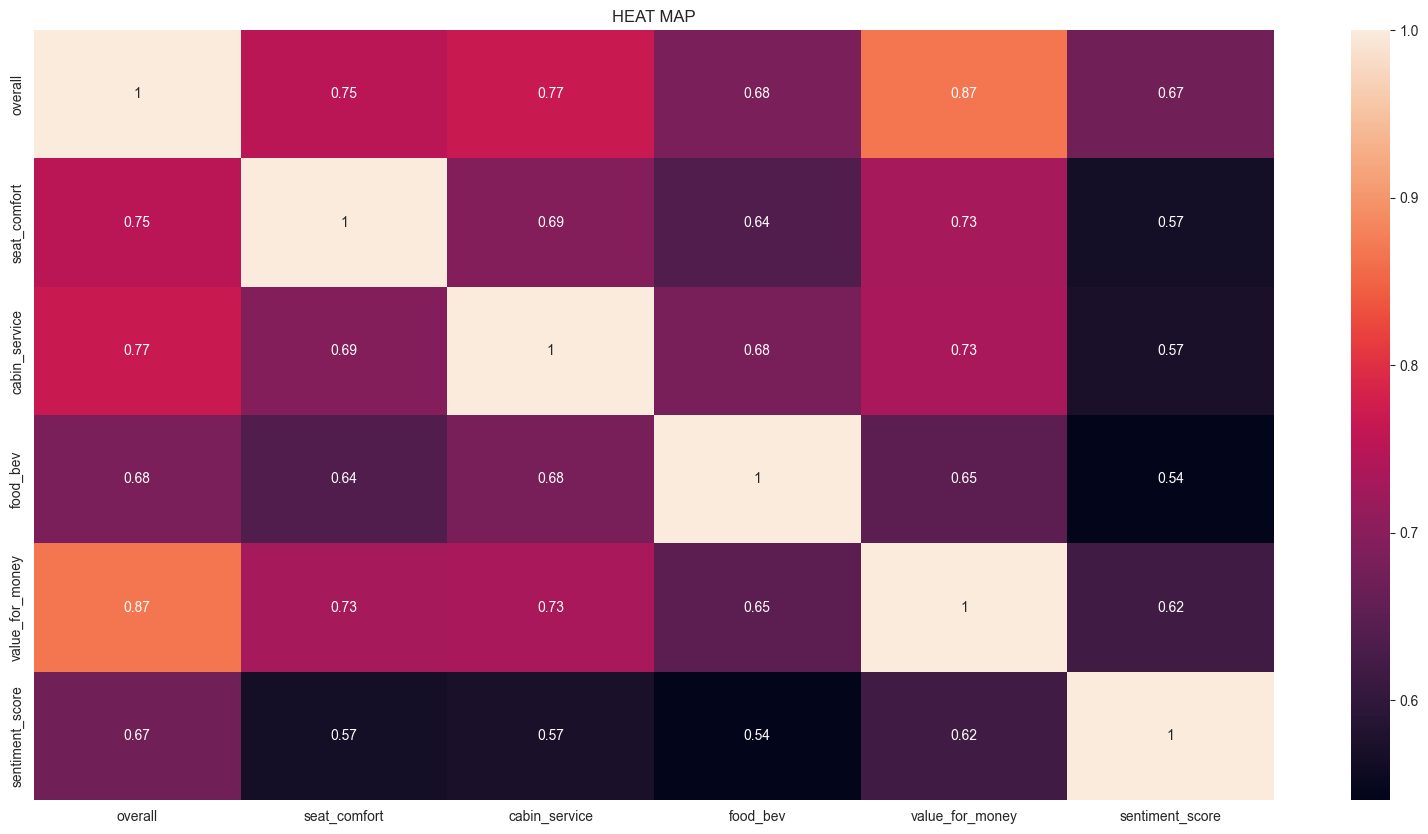

In [34]:
plt.figure (figsize= (20,10))
corelation= num_df.corr()
sns.heatmap(corelation, annot=True)
plt.title("HEAT MAP")
plt.show()

from The correlation or HEAP MAP model, we can see that the correlation between independent variables and dependent variables but some independent variables are correlated with another independent variables 

### what is VIF ?

- Variance inflation factor (VIF) can be used for feature selection in machine learning analysis. 

- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [35]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [36]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["recommended"]]])

,variables,VIF
0,overall,16.936651
1,seat_comfort,13.659860
2,cabin_service,15.144097
3,food_bev,11.567809
4,value_for_money,19.284581
5,sentiment_score,2.165313


In [37]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["recommended","value_for_money"]]])

,variables,VIF
0,overall,11.869601
1,seat_comfort,12.762900
2,cabin_service,14.637109
3,food_bev,11.320902
4,sentiment_score,2.163334


In [38]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["recommended","value_for_money","cabin_service"]]])

,variables,VIF
0,overall,10.495817
1,seat_comfort,11.279405
2,food_bev,9.227324
3,sentiment_score,2.157770


In [39]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["recommended","value_for_money","cabin_service","seat_comfort"]]])

,variables,VIF
0,overall,7.892296
1,food_bev,6.201192
2,sentiment_score,2.145812


In [40]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["recommended","value_for_money","cabin_service","seat_comfort","overall"]]])

,variables,VIF
0,food_bev,1.662385
1,sentiment_score,1.662385


In [41]:
df.drop(columns=["value_for_money","cabin_service","seat_comfort","overall"],inplace=True,axis=1)

In [42]:
df.columns

Index(['airline', 'cabin', 'food_bev', 'recommended', 'sentiment_score'], dtype='object')

In [43]:
df.head(2)

,airline,cabin,food_bev,recommended,sentiment_score
1,Turkish Airlines,Economy Class,4.0,yes,0.260263
3,Turkish Airlines,Economy Class,1.0,no,0.116667


### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the ```recommended``` column.**

In [44]:
X = df.drop('recommended', axis=1)
y = df['recommended']

In [45]:
y.head()

1    yes
3     no
5     no
7    yes
9     no
Name: recommended, dtype: object

In [46]:
# If the target column has Denied it is encoded as 1 others as 0
y= np.where(y=='yes', 1,0)

In [47]:

y

array([1, 0, 0, ..., 0, 0, 0])

## Feature Transformation

In [48]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
continuous_features=[feature for feature in num_features if len(df[feature].unique()) > 25]

print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))


We have 1 continuous_features : ['sentiment_score']


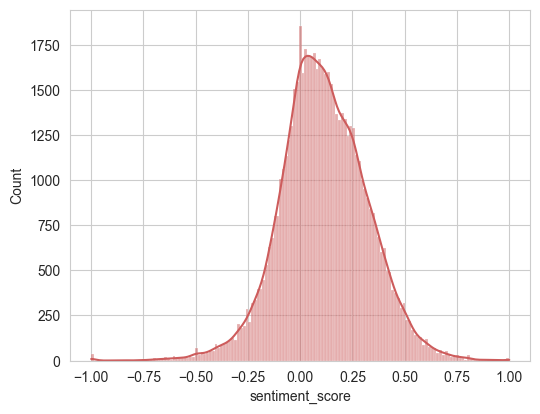

In [49]:

plt.figure(figsize=(15, 12))
for i, col in enumerate(['sentiment_score']):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=X[col], color='indianred',kde=True)
    plt.xlabel(col)
    plt.tight_layout()


In [50]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

sentiment_score   -0.067405
dtype: float64

## Apply Power Transformer to Check if it can reduces the outliers

In [51]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['sentiment_score']
X_copy = pt.fit_transform(X[transform_features])

In [52]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

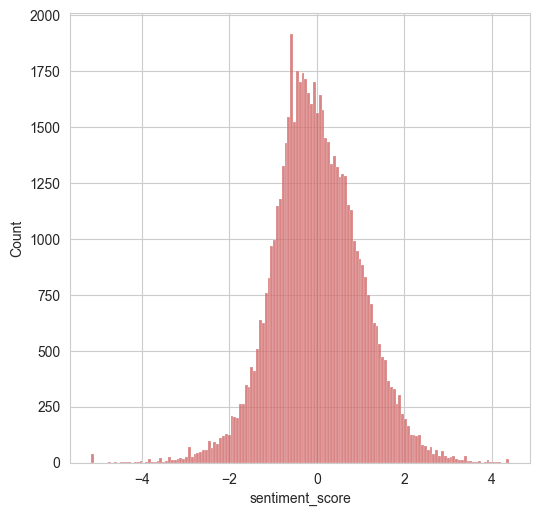

In [53]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(transform_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

## After applying the yeo-johnson transformation all contiune features are removed right skewed and the resulting contiune features are approximately symmetric distributions.







- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [54]:

X_copy

,sentiment_score
0,0.706135
1,0.008852
2,-0.456854
3,1.122325
4,0.372060
...,...
61178,0.884120
61179,1.044439
61180,-0.300817
61181,-0.715568


In [55]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

airline : 81
cabin : 4
recommended : 2


 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting number features for preprocessing**

In [56]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [57]:
num_features

['food_bev', 'sentiment_score']

In [58]:
df.head(2)

,airline,cabin,food_bev,recommended,sentiment_score
1,Turkish Airlines,Economy Class,4.0,yes,0.260263
3,Turkish Airlines,Economy Class,1.0,no,0.116667


### **Preprocessing using Column Transformer**

In [59]:
# we can use code for another projects
# Create Column Transformer with 3 types of transformers
#or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']

or_columns = ["airline","cabin"]

transform_columns= ['sentiment_score']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
#oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer([
   #  [   ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [60]:
X = preprocessor.fit_transform(X)

In [61]:
X

array([[ 7.10000000e+01,  1.00000000e+00,  7.06134747e-01,
         8.13959185e-01,  7.09525289e-01],
       [ 7.10000000e+01,  1.00000000e+00,  8.85231988e-03,
        -1.46169633e+00,  1.72503382e-02],
       [ 7.10000000e+01,  1.00000000e+00, -4.56853865e-01,
        -1.46169633e+00, -4.49726117e-01],
       ...,
       [ 7.20000000e+01,  1.00000000e+00, -3.00816816e-01,
         3.36864687e-16, -2.92820485e-01],
       [ 7.20000000e+01,  1.00000000e+00, -7.15568404e-01,
         3.36864687e-16, -7.10916647e-01],
       [ 7.20000000e+01,  1.00000000e+00,  1.26868199e+00,
         3.36864687e-16,  1.26266697e+00]])

In [62]:
X.shape

(61183, 5)

## Classification

In [63]:
y.shape

(61183,)

- No need smote technquie because data is balanced

In [64]:
#from collections import Counter
#from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
#smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
#print(len(X),len(y))
#X_res, y_res = smt.fit_resample(X, y)
#len(X_res), len(y_res) 

In [65]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((48946, 5), (12237, 5))

In [66]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [67]:
def evaluate_clf(true, predicted):
    accuracy = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return accuracy, f1 , precision, recall, roc_auc

In [68]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}


In [69]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [70]:
base_model_report =evaluate_models(X=X, y=y, models=models)

Random Forest
Model performance for Training set
- Accuracy: 0.9976
- F1 score: 0.9974
- Precision: 0.9980
- Recall: 0.9967
- Roc Auc Score: 0.9975
----------------------------------
Model performance for Test set
- Accuracy: 0.8523
- F1 score: 0.8400
- Precision: 0.8529
- Recall: 0.8274
- Roc Auc Score: 0.8508


Decision Tree
Model performance for Training set
- Accuracy: 0.9976
- F1 score: 0.9974
- Precision: 0.9995
- Recall: 0.9953
- Roc Auc Score: 0.9975
----------------------------------
Model performance for Test set
- Accuracy: 0.8165
- F1 score: 0.8042
- Precision: 0.8039
- Recall: 0.8046
- Roc Auc Score: 0.8158


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8711
- F1 score: 0.8592
- Precision: 0.8727
- Recall: 0.8461
- Roc Auc Score: 0.8694
----------------------------------
Model performance for Test set
- Accuracy: 0.8700
- F1 score: 0.8587
- Precision: 0.8746
- Recall: 0.8433
- Roc Auc Score: 0.8684


Logistic Regression
Model performance for Training 

In [71]:
base_model_report

,Model Name,Accuracy
6,CatBoosting Classifier,0.872763
5,XGBClassifier,0.872354
2,Gradient Boosting,0.869984
8,AdaBoost Classifier,0.863610
7,Support Vector Classifier,0.860587
3,Logistic Regression,0.860260
4,K-Neighbors Classifier,0.854540
0,Random Forest,0.852333
1,Decision Tree,0.816540


**Here we can use Random Forest for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest**

In [93]:
#Initialize few parameter for Hyperparamter tuning
# xgboost_params = {
 #   'max_depth':range(3,10,2),
 #   'min_child_weight':range(1,6,2)}

catboost_params = {
    'depth': [10,12,15,20],
    
    'iterations': range(100, 500, 200),
    'l2_leaf_reg': [1, 3, 5, 7, 9]    
}   
gradientboost_params = {
  
    'n_estimators': [10,50,100,200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': range(2, 10),
    
}


rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}



In [94]:
# Models list for Hyperparameter tuning
randomcv_models = [
    
    
    ("CatBoost", CatBoostClassifier(), catboost_params),
    ("GradientBoost", GradientBoostingClassifier(), gradientboost_params),
    ("RF", RandomForestClassifier(), rf_params)]
    

**Create a function for model training and report which can be used in hyperparameter tuning loop**


In [95]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    try:
        random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
        random.fit(X, y)
        model_param[name] = random.best_params_
    except Exception as e:
        print(f'exception for {name} : {e}')



Fitting 3 folds for each of 40 candidates, totalling 120 fits
0:	learn: 0.6760193	total: 39.7ms	remaining: 3.93s
1:	learn: 0.6595665	total: 52.6ms	remaining: 2.58s
2:	learn: 0.6439707	total: 105ms	remaining: 3.4s
3:	learn: 0.6290539	total: 137ms	remaining: 3.28s
4:	learn: 0.6149528	total: 158ms	remaining: 3.01s
5:	learn: 0.6015487	total: 193ms	remaining: 3.02s
6:	learn: 0.5891595	total: 229ms	remaining: 3.04s
7:	learn: 0.5771586	total: 281ms	remaining: 3.23s
8:	learn: 0.5657386	total: 307ms	remaining: 3.11s
9:	learn: 0.5550297	total: 343ms	remaining: 3.08s
10:	learn: 0.5450925	total: 378ms	remaining: 3.05s
11:	learn: 0.5356339	total: 430ms	remaining: 3.15s
12:	learn: 0.5264771	total: 463ms	remaining: 3.1s
13:	learn: 0.5176712	total: 500ms	remaining: 3.07s
14:	learn: 0.5093034	total: 547ms	remaining: 3.1s
15:	learn: 0.5013490	total: 602ms	remaining: 3.16s
16:	learn: 0.4938014	total: 644ms	remaining: 3.15s
17:	learn: 0.4863489	total: 677ms	remaining: 3.08s
18:	learn: 0.4792001	total: 711

In [96]:
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for CatBoost -------------------
{'l2_leaf_reg': 9, 'iterations': 100, 'depth': 10}
---------------- Best Params for GradientBoost -------------------
{'n_estimators': 50, 'min_samples_split': 7, 'max_depth': 3}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10}


In [97]:
model_param

{'CatBoost': {'l2_leaf_reg': 9, 'iterations': 100, 'depth': 10},
 'GradientBoost': {'n_estimators': 50, 'min_samples_split': 7, 'max_depth': 3},
 'RF': {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10}}

## Retraining the Model with best Parameters

In [99]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "GradientBoostingClassifier": GradientBoostingClassifier(**model_param['GradientBoost']),
    "CatBoostClassifier": CatBoostClassifier(**model_param['CatBoost']),
}
tuned_report =evaluate_models(X=X, y=y, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 0.8822
- F1 score: 0.8715
- Precision: 0.8843
- Recall: 0.8589
- Roc Auc Score: 0.8806
----------------------------------
Model performance for Test set
- Accuracy: 0.8657
- F1 score: 0.8541
- Precision: 0.8696
- Recall: 0.8391
- Roc Auc Score: 0.8641


GradientBoostingClassifier
Model performance for Training set
- Accuracy: 0.8687
- F1 score: 0.8569
- Precision: 0.8682
- Recall: 0.8459
- Roc Auc Score: 0.8672
----------------------------------
Model performance for Test set
- Accuracy: 0.8666
- F1 score: 0.8553
- Precision: 0.8692
- Recall: 0.8419
- Roc Auc Score: 0.8652


0:	learn: 0.6761498	total: 35.4ms	remaining: 3.5s
1:	learn: 0.6596828	total: 48.9ms	remaining: 2.4s
2:	learn: 0.6440045	total: 94.4ms	remaining: 3.05s
3:	learn: 0.6292575	total: 118ms	remaining: 2.83s
4:	learn: 0.6153160	total: 138ms	remaining: 2.63s
5:	learn: 0.6024856	total: 163ms	remaining: 2.56s
6:	learn: 0.5899606	total: 195ms	remaining: 2

In [100]:
tuned_report

,Model Name,Accuracy
2,CatBoostClassifier,0.867615
1,GradientBoostingClassifier,0.866634
0,Random Forest Classifier,0.865735


In [101]:
best_model = CatBoostClassifier(**model_param['CatBoost'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'CatBoost''")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

0:	learn: 0.6761498	total: 26.1ms	remaining: 2.58s
1:	learn: 0.6596828	total: 35.9ms	remaining: 1.76s
2:	learn: 0.6440045	total: 62.1ms	remaining: 2.01s
3:	learn: 0.6292575	total: 117ms	remaining: 2.82s
4:	learn: 0.6153160	total: 138ms	remaining: 2.61s
5:	learn: 0.6024856	total: 162ms	remaining: 2.54s
6:	learn: 0.5899606	total: 184ms	remaining: 2.44s
7:	learn: 0.5782467	total: 200ms	remaining: 2.29s
8:	learn: 0.5671713	total: 224ms	remaining: 2.27s
9:	learn: 0.5564338	total: 251ms	remaining: 2.25s
10:	learn: 0.5462612	total: 298ms	remaining: 2.41s
11:	learn: 0.5367171	total: 325ms	remaining: 2.38s
12:	learn: 0.5274919	total: 339ms	remaining: 2.27s
13:	learn: 0.5187718	total: 360ms	remaining: 2.21s
14:	learn: 0.5102751	total: 379ms	remaining: 2.15s
15:	learn: 0.5024736	total: 391ms	remaining: 2.05s
16:	learn: 0.4947090	total: 431ms	remaining: 2.11s
17:	learn: 0.4872173	total: 454ms	remaining: 2.07s
18:	learn: 0.4800553	total: 475ms	remaining: 2.02s
19:	learn: 0.4733701	total: 507ms	rema

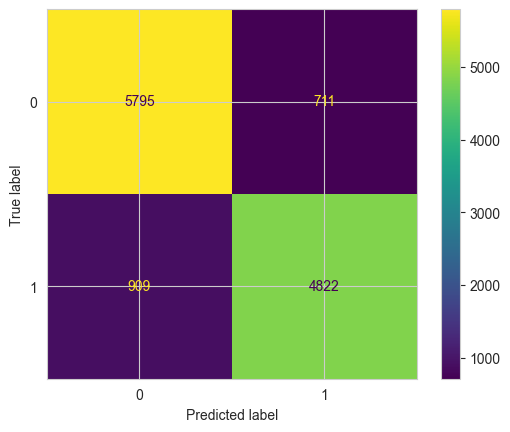

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

### Best Model is Catboostclassifier  without hyperparameter tuning Accuracy 87%
